In [2]:
!pip install pandas yfinance matplotlib scikit-learn numpy keras tensorflow 


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd
import yfinance as yf

In [4]:
df = yf.download('AAPL', start="2015-01-01", end="2025-08-22")

/tmp/ipykernel_1363/1444530842.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start="2015-01-01", end="2025-08-22")
[*********************100%***********************]  1 of 1 completed


In [5]:
df.head(10)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.261045,24.729268,23.821670,24.718172,212818400
2015-01-05,23.577570,24.110146,23.391169,24.030260,257142000
2015-01-06,23.579792,23.839422,23.218083,23.641926,263188400
2015-01-07,23.910431,24.010288,23.677428,23.788382,160423600
2015-01-08,24.829128,24.886824,24.121246,24.238858,237458000
2015-01-09,24.855762,25.130926,24.456330,25.002220,214798000
2015-01-12,24.243299,24.993343,24.143442,24.986686,198603200
2015-01-13,24.458546,25.031065,24.167849,24.727052,268367600


In [6]:
df.tail(10)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-08-08,229.090012,230.738135,219.001455,220.579666,113854000
2025-08-11,227.179993,229.559998,224.759995,227.919998,61806100
2025-08-12,229.649994,230.800003,227.070007,228.009995,55626200
2025-08-13,233.330002,235.000000,230.429993,231.070007,69878500
2025-08-14,232.779999,235.119995,230.850006,234.059998,51916300
2025-08-15,231.589996,234.279999,229.339996,234.000000,56038700
2025-08-18,230.889999,233.119995,230.110001,231.699997,37476200
2025-08-19,230.559998,232.869995,229.350006,231.279999,39402600


In [7]:
df.to_csv('AAPL_raw_data.csv')

In [8]:
df = pd.read_csv('AAPL_raw_data.csv', header=0, skiprows=[1, 2])

In [9]:
df.rename(columns={'Price': 'Date'}, inplace=True)

In [ ]:
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)

In [11]:
df['Change_Over_Time'] = df['Close'].diff()

In [12]:
df['Change_Over_Time'].fillna(0, inplace=True)

/tmp/ipykernel_1363/2688746579.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Change_Over_Time'].fillna(0, inplace=True)


In [13]:
df['typical_price'] = (df['High'] + df['Low'] + df['Close']) / 3
df['tp_volume'] = df['typical_price'] * df['Volume']
df['VWAP'] = df['tp_volume'].groupby(df.index.date).cumsum() / df['Volume'].groupby(df.index.date).cumsum()

In [14]:
df = df.drop(columns=['typical_price', 'tp_volume'])

In [15]:
df.head()

,Close,High,Low,Open,Volume,Change_Over_Time,VWAP
Date,,,,,,,
2015-01-02,24.261045,24.729268,23.821670,24.718172,212818400,0.000000,24.270661
2015-01-05,23.577570,24.110146,23.391169,24.030260,257142000,-0.683475,23.692962
2015-01-06,23.579792,23.839422,23.218083,23.641926,263188400,0.002222,23.545766
2015-01-07,23.910431,24.010288,23.677428,23.788382,160423600,0.330639,23.866049
2015-01-08,24.829128,24.886824,24.121246,24.238858,237458000,0.918697,24.612399


In [16]:
df.tail()

,Close,High,Low,Open,Volume,Change_Over_Time,VWAP
Date,,,,,,,
2025-08-15,231.589996,234.279999,229.339996,234.000000,56038700,-1.190002,231.736664
2025-08-18,230.889999,233.119995,230.110001,231.699997,37476200,-0.699997,231.373332
2025-08-19,230.559998,232.869995,229.350006,231.279999,39402600,-0.330002,230.926666
2025-08-20,226.009995,230.470001,225.770004,229.979996,42263900,-4.550003,227.416667
2025-08-21,224.899994,226.520004,223.779999,226.270004,30593700,-1.110001,225.066666


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2675 entries, 2015-01-02 to 2025-08-21
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Close             2675 non-null   float64
 1   High              2675 non-null   float64
 2   Low               2675 non-null   float64
 3   Open              2675 non-null   float64
 4   Volume            2675 non-null   int64  
 5   Change_Over_Time  2675 non-null   float64
 6   VWAP              2675 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 167.2 KB


In [18]:
df.describe()

,Close,High,Low,Open,Volume,Change_Over_Time,VWAP
count,2675.000000,2675.000000,2675.000000,2675.000000,2.675000e+03,2675.000000,2675.000000
mean,101.202573,102.219138,100.085710,101.111830,1.135436e+08,0.075005,101.169140
std,69.880557,70.570842,69.109159,69.805644,6.805920e+07,2.205956,69.849299
min,20.624050,20.927678,20.425436,20.546428,2.323470e+07,-20.649475,20.713082
25%,36.277187,36.534229,35.936830,36.283725,6.768410e+07,-0.520250,36.264798
50%,76.876083,77.364229,76.000021,76.650560,9.648600e+07,0.048195,76.678022
75%,163.170578,164.780423,161.743952,163.092032,1.384640e+08,0.734273,163.269789
max,258.103729,259.179926,256.718662,257.276679,6.488252e+08,26.365479,258.000772


In [19]:
df.isna().sum()

Close               0
High                0
Low                 0
Open                0
Volume              0
Change_Over_Time    0
VWAP                0
dtype: int64

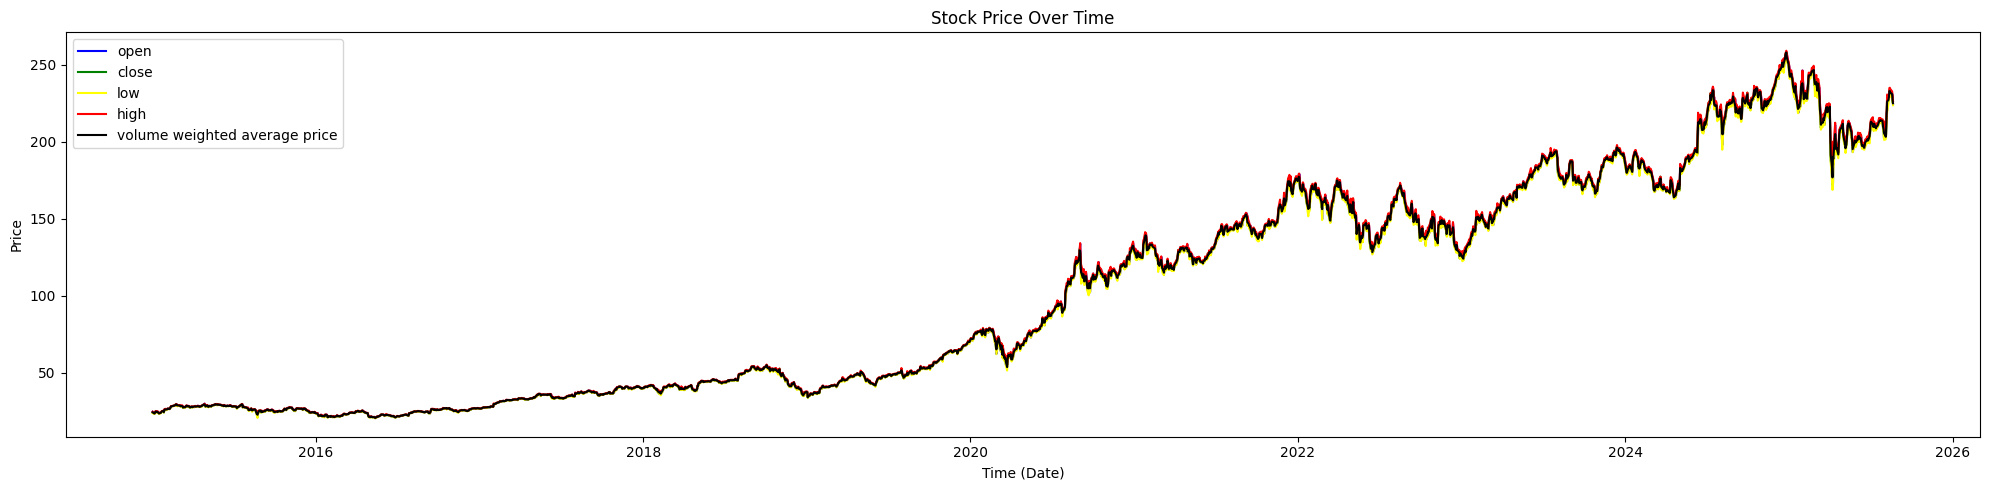

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.subplot(1, 1, 1)

plt.plot(df.index, df['Open'], color='blue', label='open')
plt.plot(df.index, df['Close'], color='green', label='close')
plt.plot(df.index, df['Low'], color='yellow', label='low')
plt.plot(df.index, df['High'], color='red', label='high')
plt.plot(df.index, df['VWAP'], color='black', label='volume weighted average price')

plt.title('Stock Price Over Time')
plt.xlabel('Time (Date)')
plt.ylabel('Price')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

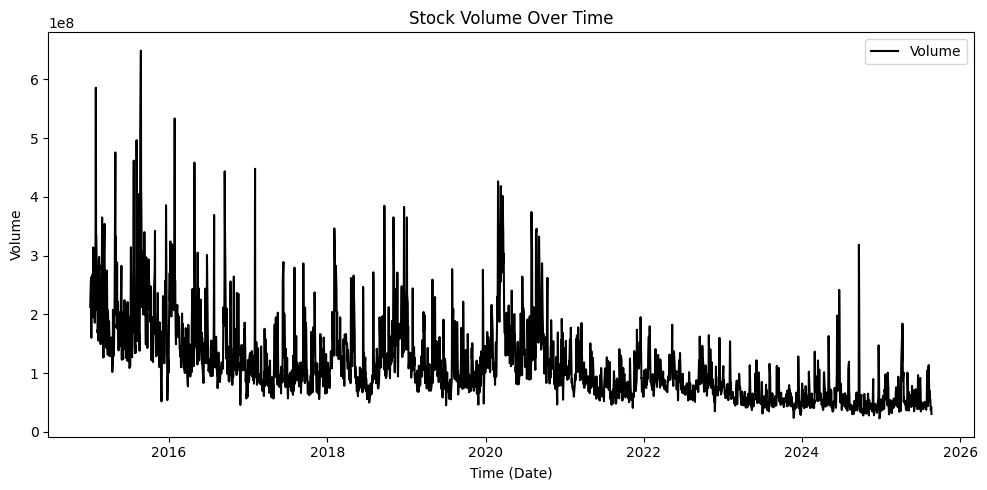

In [21]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 1, 1)

plt.plot(df.index, df['Volume'], color='black', label='Volume')

plt.title('Stock Volume Over Time')
plt.xlabel('Time (Date)')
plt.ylabel('Volume')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Data Processing

In [22]:
from sklearn.preprocessing import MinMaxScaler

df1=df
df.head()
df1.drop(df.columns[[0,1,2,3,4,5]],axis=1,inplace=True)
df1
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(df1)

In [23]:
train_size = int(len(df) * 0.70)
test_size = len(df) - train_size
train, test = df1[0:train_size,:], df1[train_size:len(df),:]
print(len(train),len(test))

1872 803


In [24]:
def create(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [25]:
import numpy as np

look_back=1
trainX, trainY = create(train, look_back)
testX, testY = create(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape

(1870, 1, 1)

## Fit LSTM Model

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error

model = Sequential()
model.add(LSTM(5, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='RMSProp')
model.fit(trainX, trainY, epochs=100, batch_size=8, verbose=1)

2025-08-22 15:45:30.480719: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-22 15:45:30.540768: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-22 15:45:32.462928: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


Epoch 1/100


2025-08-22 15:45:32.972911: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/gitpod/.pyenv/versions/3.12.11/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0437
Epoch 2/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0227
Epoch 3/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0090
Epoch 4/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2230e-04
Epoch 5/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0768e-05
Epoch 6/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9818e-05
Epoch 7/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.9259e-05
Epoch 8/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.7921e-05
Epoch 9/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.7442e-05
Epoch 10/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.6951e-05
Epoch 11/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5462e-05
Epoch 12/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6534e-05
Epoch 13/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5573e-05
Epoch 14/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6370e-05
Epoch 15/10

In [27]:
import math

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Train Score: 1.42 RMSE
Test Score: 6.57 RMSE


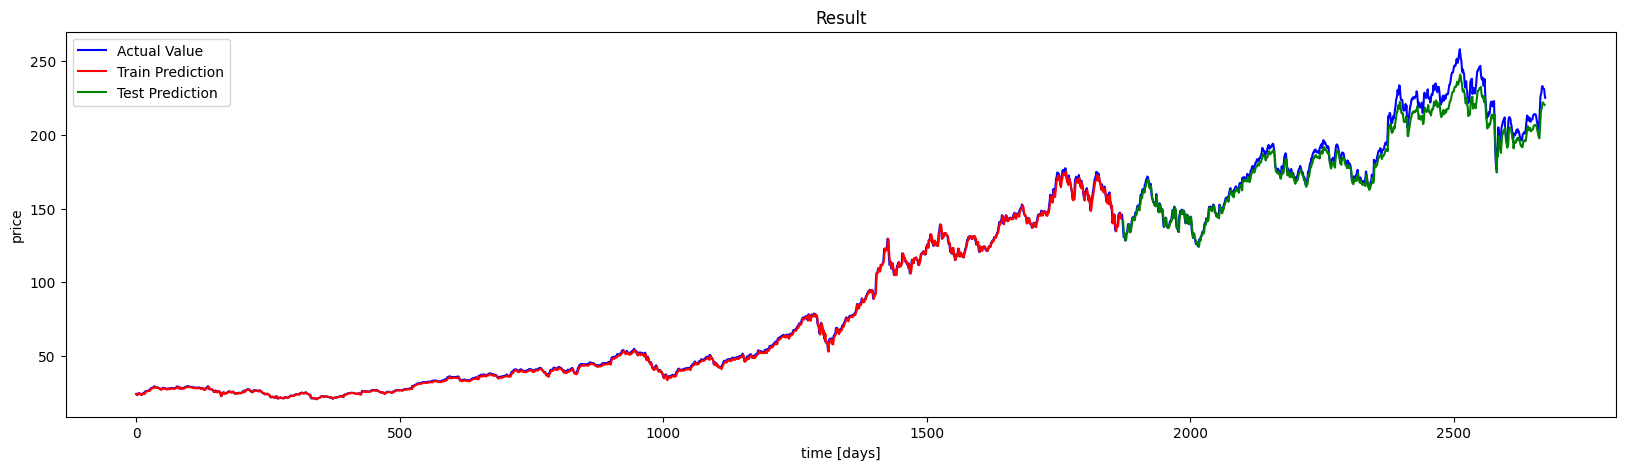

In [28]:
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df1)-1, :] = testPredict

plt.figure(figsize=(20, 5))
plt.subplot(1,1,1)
plt.plot(scaler.inverse_transform(df1),color='blue',label='Actual Value')
plt.plot(trainPredictPlot,color='red',label='Train Prediction')
plt.plot(testPredictPlot,color='green',label='Test Prediction')
plt.title('Result')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()
predict=pd.DataFrame({'Predicted':testPredict[:,0]})
cc=df1[0:train_size,:]

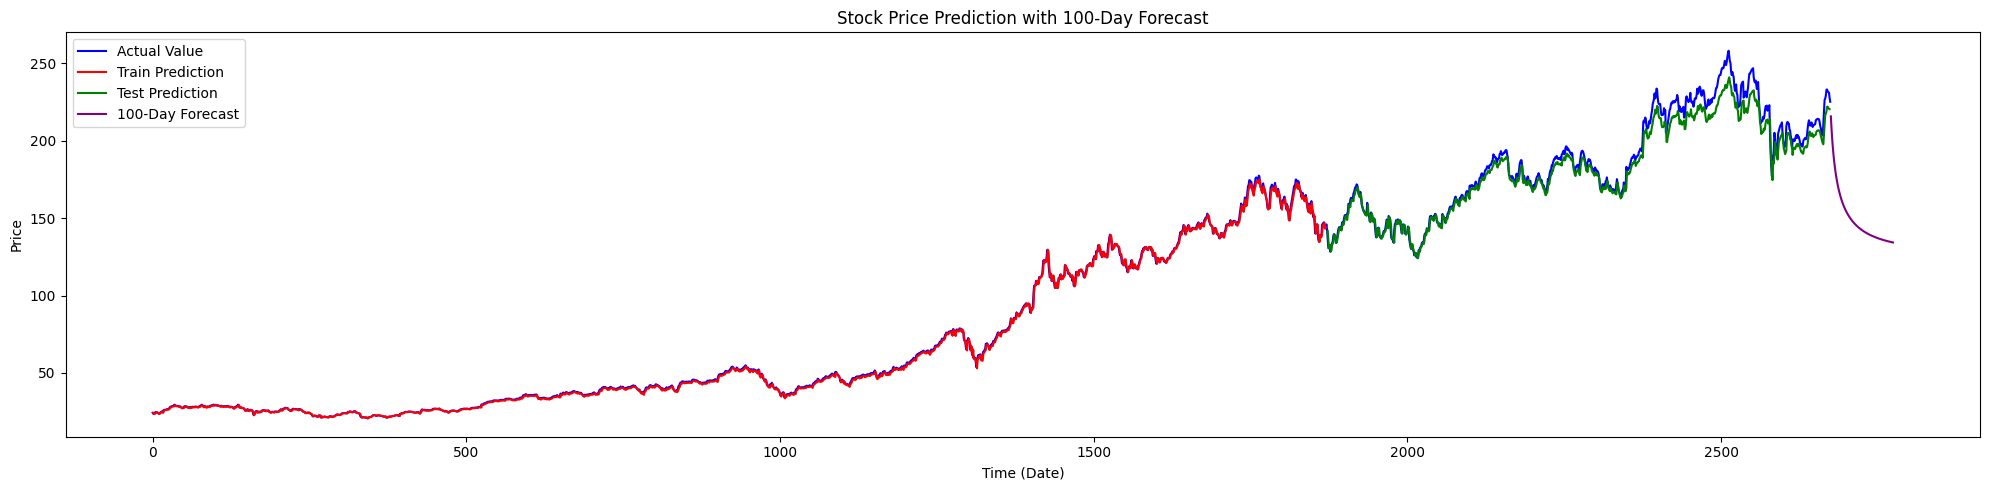

In [32]:
look_back = 1
last_day_scaled = df1[-look_back:]
future_predictions_scaled = []

# Loop to predict the next 100 days
for _ in range(100):
    predicted_next_day_scaled = model.predict(last_day_scaled.reshape(1, 1, look_back), verbose=0)[0][0]
    future_predictions_scaled.append(predicted_next_day_scaled)
    last_day_scaled = np.array([predicted_next_day_scaled]).reshape(1, look_back, 1)

# Inverse transform the predictions to the original price scale
future_predictions = scaler.inverse_transform(np.array(future_predictions_scaled).reshape(-1, 1))

# Now, create the new plot
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(df1) - 1, :] = testPredict

# Create a new array for future predictions to be plotted
futurePredictPlot = np.empty_like(df1)
futurePredictPlot[:, :] = np.nan
last_index = len(df1) - 1
futurePredictPlot = np.concatenate((futurePredictPlot, future_predictions), axis=0)

# Shift the future predictions to the end of the original data index for plotting
plot_index = np.arange(last_index + 1, last_index + 101)
future_data_df = pd.DataFrame(future_predictions, index=plot_index)

# Plot everything
plt.figure(figsize=(20, 5))
plt.subplot(1, 1, 1)

plt.plot(scaler.inverse_transform(df1), color='blue', label='Actual Value')
plt.plot(trainPredictPlot, color='red', label='Train Prediction')
plt.plot(testPredictPlot, color='green', label='Test Prediction')
plt.plot(future_data_df, color='purple', label='100-Day Forecast')

plt.title('Stock Price Prediction with 100-Day Forecast')
plt.xlabel('Time (Date)')
plt.ylabel('Price')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
